Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Number of validation batches: 26
Number of test batches: 6
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.5251 - loss: 0.7810 - val_accuracy: 0.5619 - val_loss: 0.6825
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5867 - loss: 0.6722 - val_accuracy: 0.6411 - val_loss: 0.6356
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.6738 - loss: 0.6096 - val_accuracy: 0.7054 - val_loss: 0.5793
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7536 - loss: 0.5030 - val_accuracy: 0.7166 - val_loss: 0.5727
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.8225 - loss: 0.4170 - val_accuracy: 0.7191 - val_loss: 0.5879
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.8640 - loss: 0.3289 - val_accuracy: 0.6708 - val_loss: 0.7347
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.8679 - loss: 0.280

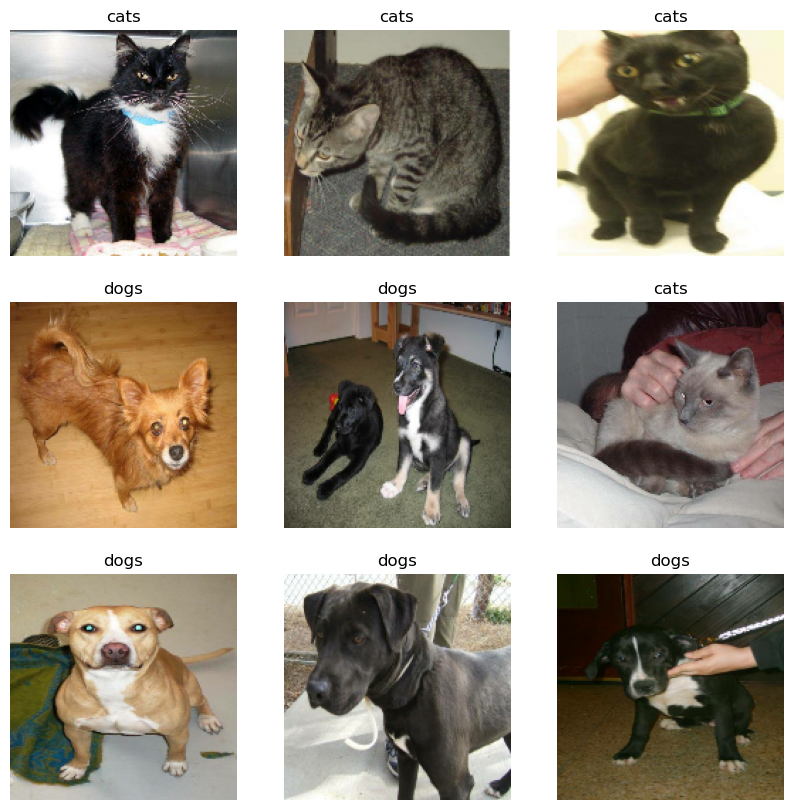

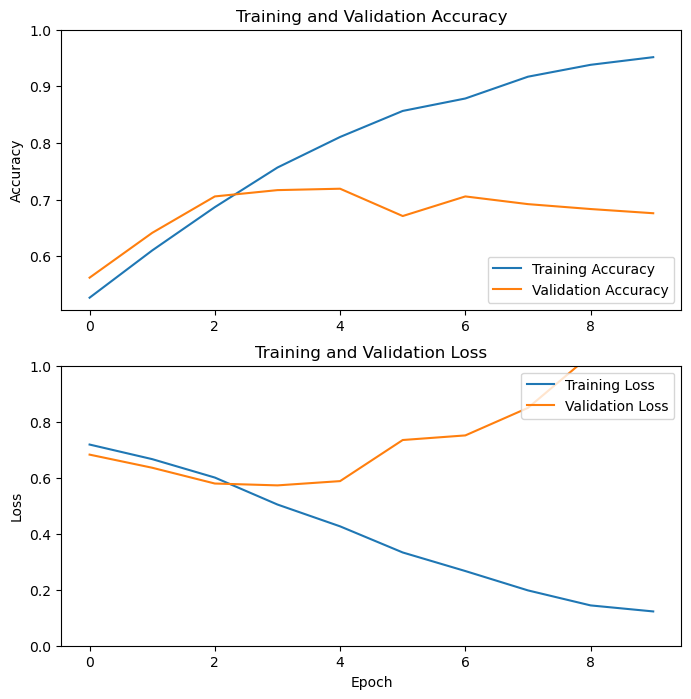

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# Download and extract the dataset

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# Constants for dataset loading and training
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# Load training and validation datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# Extract class names
class_names = train_dataset.class_names

# Visualize a few images from the training set
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Split the validation dataset into test and validation sets
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')

# Plot training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
The task here is to implement an image classifier using a Convolutional Neural Network (CNN). We are using the "cats and dogs" dataset for binary classification. 
CNNs are powerful deep learning models for image classification because they can capture spatial hierarchies in images, learning features such as edges, shapes, and objects, 
making them well-suited for tasks like image recognition.

Key Concepts:

Convolutional Layers: These layers apply filters to input images, detecting spatial features.

Pooling Layers: These layers reduce the spatial dimensions of the input, which helps in reducing computational cost and prevents overfitting.

Fully Connected Layers: These layers process the high-level features extracted by convolutional layers and make final predictions.



3. Explanation of the Code:

Data Preparation:

We load the "cats and dogs" dataset from a zip file hosted on Google Cloud.

The images are loaded into train_dataset and validation_dataset using image_dataset_from_directory which automatically labels images based on their folder names (cats vs dogs).

Data Visualization:
A few images from the training set are displayed to understand the dataset.

Model Architecture:
The model starts with a Rescaling layer (to normalize pixel values between 0 and 1).
Three convolutional layers (Conv2D) are used, each followed by a MaxPooling2D layer to reduce spatial dimensions.
The output of the last convolutional layer is flattened into a vector and passed through a fully connected layer (Dense) with ReLU activation.
The final layer is a Dense layer with a sigmoid activation function for binary classification (cats vs dogs).

Training the Model:
The model is compiled using the Adam optimizer and binary cross-entropy loss function.
We train the model for 10 epochs, and validation accuracy is monitored during the training.

Evaluation and Visualization:
After training, the model is evaluated on a separate test dataset.
The accuracy and loss are plotted for both training and validation datasets to visualize the model's performance.